In [1]:
import pandas as pd 
data_dir = "C:/Users/yomna/Documents/Semester 9/Data Engineering/"
df= pd.read_csv(data_dir + "green_tripdata_2018-10.csv")
# uploading the dataset 

c:\Users\yomna\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

In [3]:
df.info()
#exploring the columns, the size, the datatypes and the non-null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731899 entries, 0 to 731898
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 731899 non-null  object 
 1   lpep pickup datetime   731899 non-null  object 
 2   lpep dropoff datetime  731899 non-null  object 
 3   store and fwd flag     709677 non-null  object 
 4   Rate type              731899 non-null  object 
 5   PU Location            731899 non-null  object 
 6   DO Location            731899 non-null  object 
 7   passenger count        708963 non-null  float64
 8   trip distance          731899 non-null  float64
 9   fare amount            731899 non-null  float64
 10  extra                  343382 non-null  float64
 11  mta tax                731899 non-null  float64
 12  tip amount             731899 non-null  float64
 13  tolls amount           731899 non-null  float64
 14  ehail fee              70 non-null  

In [4]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,-0.006923,-0.003364,-0.006520,-0.005146,0.001563,-0.003033,NaN,0.027579,-0.002805,NaN
trip distance,-0.006923,1.000000,0.925063,0.340935,0.026852,0.148349,0.409466,NaN,-0.259175,0.916713,NaN
fare amount,-0.003364,0.925063,1.000000,0.499124,0.019400,0.143790,0.364385,NaN,-0.299086,0.983422,NaN
extra,-0.006520,0.340935,0.499124,1.000000,0.120920,-0.104614,0.146354,NaN,-0.732333,0.494971,NaN
mta tax,-0.005146,0.026852,0.019400,0.120920,1.000000,0.005307,-0.002634,NaN,0.518558,0.031251,NaN
tip amount,0.001563,0.148349,0.143790,-0.104614,0.005307,1.000000,0.063805,NaN,0.106736,0.285421,NaN
tolls amount,-0.003033,0.409466,0.364385,0.146354,-0.002634,0.063805,1.000000,NaN,-0.095474,0.451922,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.027579,-0.259175,-0.299086,-0.732333,0.518558,0.106736,-0.095474,NaN,1.000000,-0.272278,NaN
total amount,-0.002805,0.916713,0.983422,0.494971,0.031251,0.285421,0.451922,NaN,-0.272278,1.000000,NaN


In [5]:
def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    df.columns = [col.replace(' ', '_') for col in df.columns]
    
rename_columns(df)



In [6]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.030362
rate_type                0.000000
pu_location              0.000000
do_location              0.000000
passenger_count          0.031338
trip_distance            0.000000
fare_amount              0.000000
extra                    0.530834
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                0.999904
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.028459
trip_type                0.000000
congestion_surcharge     1.000000
dtype: float64

In [7]:
df=df.drop(columns=['congestion_surcharge'])
# dropping the congestion_surcharge column as it is empty

In [8]:
df= df.drop_duplicates()
# dropping the duplicate rows

In [9]:
df['store_and_fwd_flag'].unique() # MCAR as it doesn't have any relation with any other variables  
df=df.dropna( subset=['store_and_fwd_flag']) #dropping missing values less than 5%

In [10]:
df['passenger_count'].unique()#MCAR
df=df.dropna( subset=['passenger_count']) #dropping missing values less than 5%

In [11]:
df['extra'].unique() #exploring the extra column values
df["extra"] = df["extra"].fillna(value=0) # imputing the extra nan values with 0 (MAR)

In [12]:
df['ehail_fee'].unique() #exploring the ehail_fee values
df=df.drop('ehail_fee',axis=1) # dropping it as it is almost empty

In [13]:
df['payment_type'].unique() #exploring the values of the payment_types
df["payment_type"] = df["payment_type"].fillna(value='Uknown') # (MAR) imputing the nans with Unknown 

In [14]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
dtype: float64

In [15]:
def skewness(df):
    for column in df.columns:
        if(df[column].dtype==float):
            skeww = df[column].skew()
            print(f"Skewness of {column}: {skeww}")
      

In [16]:
skewness(df) # a generated method to observe the skewness of each column

Skewness of passenger_count: 165.67834795419415
Skewness of trip_distance: 2.731661198597796
Skewness of fare_amount: 3.4251387455366946
Skewness of extra: 1.0189672539566956
Skewness of mta_tax: -8.582480222006424
Skewness of tip_amount: 39.26571004196824
Skewness of tolls_amount: 148.50570410020572
Skewness of improvement_surcharge: -4.685583106779475
Skewness of total_amount: 3.543404478251413


In [17]:
def iqr(df):
    for column in df.columns:
        if(df[column].dtype==float):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower = Q1 - cut_off
            upper =  Q3 + cut_off
            df1 = df[df[column]> upper]
            df2 = df[df[column] < lower]
            print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

    

In [18]:
iqr(df) # iqr helps in detecting the outliers (those are the number of outliers in each numerical column)

Total number of outliers are 102545
Total number of outliers are 60938
Total number of outliers are 49918
Total number of outliers are 561
Total number of outliers are 12736
Total number of outliers are 41673
Total number of outliers are 27243
Total number of outliers are 34453
Total number of outliers are 52370


In [19]:
df['passenger_count'].value_counts()

passenger_count
1.0      606395
2.0       53434
5.0       23811
6.0       11705
3.0        9989
4.0        3579
7.0          10
8.0           7
444.0         5
9.0           5
Name: count, dtype: int64

In [20]:
import numpy as np
def handling_with_mean(df,column):
    
    median = df[column].median()
    cutoff_pos = df[column].mean() + df[column].std() * 3
    cutoff_neg = df[column].mean() - df[column].std() * 3
    condition_series = ((df[column]> cutoff_pos) | (df[column] < cutoff_neg))
    df[column] = np.where(condition_series, median,df[column])
            


 # handling the outliers with mean       
    

In [21]:
handling_with_mean(df,'passenger_count')
df['passenger_count'].value_counts()

passenger_count
1.0    618127
2.0     53434
5.0     23811
3.0      9989
4.0      3579
Name: count, dtype: int64

In [22]:
df['mta_tax'].unique()
df['mta_tax'].value_counts()

mta_tax
 0.5    696204
 0.0     10860
-0.5      1876
Name: count, dtype: int64

In [23]:
def flooring_capping(df,column):
    floor = df[column].quantile(0.10)
    cap = df[column].quantile(0.90)
    df[column] = np.where(df[column] <floor, floor,df[column])
    df[column] = np.where(df[column] >cap,cap,df[column])
    
    
    #imputing the outliers using the flooring and capping technique

In [24]:
flooring_capping(df,'tip_amount')
df['tip_amount'].value_counts()

tip_amount
0.00    454429
3.09     71125
1.00     18207
2.00     13258
3.00      5235
         ...  
0.38         1
0.37         1
2.99         1
2.87         1
1.87         1
Name: count, Length: 305, dtype: int64

In [25]:
def update_total_amount(df):
    df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

    # summing up all those columns to update the total_amount in case any of the values has been imputed

In [26]:
update_total_amount(df)

In [27]:
def change_datatype(df, column, format):
    df[column] = pd.to_datetime(df[column], format=format)


    # changing the datatype of the lpep pickup datetime and the lpep dropoff datetime into datetime 
   



In [28]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
passenger_count,1.000000,-0.004193,-0.001951,0.019915,-0.012595,0.000599,-0.003778,0.033623,-0.001514
trip_distance,-0.004193,1.000000,0.931587,-0.068958,0.023279,0.045460,0.393788,-0.165891,0.927735
fare_amount,-0.001951,0.931587,1.000000,-0.059392,0.013656,0.053273,0.359101,-0.136182,0.989442
extra,0.019915,-0.068958,-0.059392,1.000000,0.126309,0.070052,-0.025342,0.193382,-0.020177
mta_tax,-0.012595,0.023279,0.013656,0.126309,1.000000,0.046871,-0.004643,0.649404,0.030072
tip_amount,0.000599,0.045460,0.053273,0.070052,0.046871,1.000000,-0.000385,0.124451,0.142124
tolls_amount,-0.003778,0.393788,0.359101,-0.025342,-0.004643,-0.000385,1.000000,-0.061089,0.455038
improvement_surcharge,0.033623,-0.165891,-0.136182,0.193382,0.649404,0.124451,-0.061089,1.000000,-0.109479
total_amount,-0.001514,0.927735,0.989442,-0.020177,0.030072,0.142124,0.455038,-0.109479,1.000000


In [29]:

def one_hot_encode_column(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column)
    
  
    one_hot = one_hot.astype(int)
    
    df = pd.concat([df, one_hot], axis=1)
    df.drop(column, axis=1, inplace=True)
    
    return df
# generating one-hot encoding method


In [30]:

df = one_hot_encode_column(df, 'vendor')


In [31]:

from sklearn import preprocessing

def number_encode_features(df,column):
        df[column] = preprocessing.LabelEncoder().fit_transform(df[column])
        return df
   
    
            # Apply LabelEncoder method
            

In [32]:
df=number_encode_features(df,'store_and_fwd_flag')

In [33]:
df=one_hot_encode_column(df,'rate_type')

In [34]:


def frequency_encoding(df, column):
    # Calculate the frequency of each category
    frequency_map = df[column].value_counts(normalize=True).to_dict()

    # Map the frequency values to the column
    df[column + '_freq_encoded'] = df[column].map(frequency_map)
 



    return df
# applying the frequency encoding technqiue

In [35]:
df=frequency_encoding(df,'pu_location')

In [36]:
def get_unique_values_with_encoded(df, column, encoded_column):
    
    unique_values_with_encoded = {}
    
    for index, row in df.iterrows():
        original_value = row[column]
        encoded_value = row[encoded_column]
        unique_values_with_encoded[original_value] = encoded_value

    return unique_values_with_encoded


In [37]:
df=frequency_encoding(df,'do_location')

In [38]:
df=number_encode_features(df,'payment_type')

In [39]:
df= number_encode_features(df,'trip_type')

In [40]:
df.corr(numeric_only=True)

,store_and_fwd_flag,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,pu_location_freq_encoded,do_location_freq_encoded
store_and_fwd_flag,1.000000,-0.005340,-0.007006,-0.005696,0.005154,-0.003082,0.003353,0.006046,0.005108,-0.004213,...,0.121734,-0.121734,0.007164,-0.000262,-0.000243,-0.004227,0.004385,0.003642,-0.009590,-0.008175
passenger_count,-0.005340,1.000000,-0.004193,-0.001951,0.019915,-0.012595,0.000599,-0.003778,0.033623,-0.001514,...,-0.048746,0.048746,-0.001178,-0.001132,0.000430,-0.041337,0.002199,0.040108,-0.006598,-0.001721
trip_distance,-0.007006,-0.004193,1.000000,0.931587,-0.068958,0.023279,0.045460,0.393788,-0.165891,0.927735,...,-0.043929,0.043929,-0.002448,0.097443,0.075118,0.210788,0.046705,-0.237508,-0.241931,-0.311218
fare_amount,-0.005696,-0.001951,0.931587,1.000000,-0.059392,0.013656,0.053273,0.359101,-0.136182,0.989442,...,-0.046891,0.046891,-0.003707,0.122235,0.099216,0.197499,0.065438,-0.234224,-0.245565,-0.321371
extra,0.005154,0.019915,-0.068958,-0.059392,1.000000,0.126309,0.070052,-0.025342,0.193382,-0.020177,...,0.028305,-0.028305,-0.003019,0.053608,-0.001840,-0.174936,-0.004432,0.159763,0.049737,0.037160
mta_tax,-0.003082,-0.012595,0.023279,0.013656,0.126309,1.000000,0.046871,-0.004643,0.649404,0.030072,...,0.002540,-0.002540,-0.004221,-0.008489,0.000229,-0.377281,-0.124976,0.379821,0.048622,0.014086
tip_amount,0.003353,0.000599,0.045460,0.053273,0.070052,0.046871,1.000000,-0.000385,0.124451,0.142124,...,0.120188,-0.120188,-0.002562,0.025052,0.008834,-0.118329,0.008615,0.108003,0.088137,-0.080217
tolls_amount,0.006046,-0.003778,0.393788,0.359101,-0.025342,-0.004643,-0.000385,1.000000,-0.061089,0.455038,...,-0.019260,0.019260,-0.000560,0.098039,0.031354,0.074240,0.095910,-0.104550,-0.061373,-0.068921
improvement_surcharge,0.005108,0.033623,-0.165891,-0.136182,0.193382,0.649404,0.124451,-0.061089,1.000000,-0.109479,...,0.058783,-0.058783,-0.002409,-0.000464,0.003552,-0.868988,0.002107,0.842951,0.142751,0.081666
total_amount,-0.004213,-0.001514,0.927735,0.989442,-0.020177,0.030072,0.142124,0.455038,-0.109479,1.000000,...,-0.034708,0.034708,-0.003929,0.130815,0.098194,0.172469,0.072924,-0.212232,-0.228872,-0.317271


In [41]:
import pandas as pd
import numpy as np


# Calculate the quantiles for 3 bins (low, medium, high)
quantiles = df['total_amount'].quantile([0.33, 0.66]).values

# Function to categorize fare amount
def categorize_fare(fare):
    if fare <= quantiles[0]:
        return 'low'
    elif fare <= quantiles[1]:
        return 'medium'
    else:
        return 'high'

# Apply the categorization function to the fare_amount column
df['fare_category'] = df['total_amount'].apply(categorize_fare)

print(df['fare_category'].unique())


['high' 'low' 'medium']


In [42]:
df=number_encode_features(df,'fare_category')

In [43]:
print(df['fare_category'])

0         0
1         1
2         2
3         1
4         2
         ..
709665    2
709666    2
731888    1
731889    2
731890    1
Name: fare_category, Length: 708940, dtype: int32


In [44]:
from sklearn.model_selection import train_test_split



selected_features = [ 'fare_amount' , 'trip_distance']
X = df[selected_features]
y=df['fare_category']

# Assuming you have already loaded and preprocessed your data, and defined X and y
# X contains the features, and y contains the target variable


# Assuming X and y are already defined

# Split the data into training, validation, and test sets
# First, split the data into 80% training and 20% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining data into 50% validation and 50% test
# Since 20% of the original data is 25% of the remaining data,
# we set the test size to 0.25 to get 20% of the original data as the test set
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# Now, X_train, y_train contain 60% of the original data as the training set
# X_validation, y_validation contain 20% of the original data as the validation set
# X_test, y_test contain 20% of the original data as the test set


# 'test_size=0.2' specifies that 20% of the data will be used for testing,
# and the remaining 80% will be used for training.

# 'random_state=42' is a random seed that ensures reproducibility.
# You can choose any integer value or omit it for a different random split each time.


In [45]:
y_train.head()

47597     2
541707    0
632631    2
383319    2
79183     2
Name: fare_category, dtype: int32

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708940 entries, 0 to 731890
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   lpep_pickup_datetime                      708940 non-null  object 
 1   lpep_dropoff_datetime                     708940 non-null  object 
 2   store_and_fwd_flag                        708940 non-null  int32  
 3   pu_location                               708940 non-null  object 
 4   do_location                               708940 non-null  object 
 5   passenger_count                           708940 non-null  float64
 6   trip_distance                             708940 non-null  float64
 7   fare_amount                               708940 non-null  float64
 8   extra                                     708940 non-null  float64
 9   mta_tax                                   708940 non-null  float64
 10  tip_amount               

Training Accuracy: 0.8957
Validation Accuracy: 0.8916
Test Accuracy: 0.8891


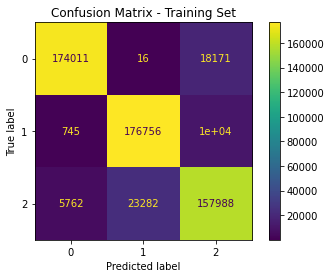

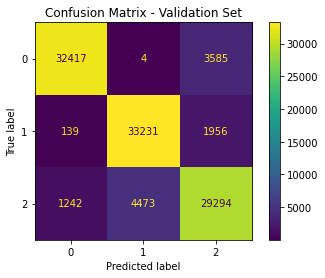

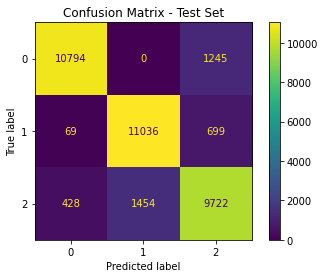

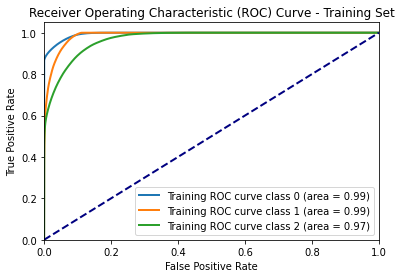

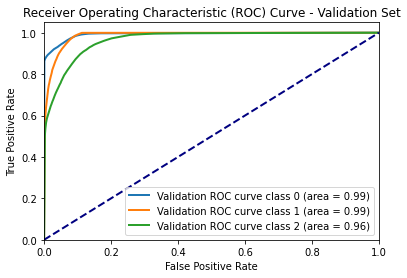

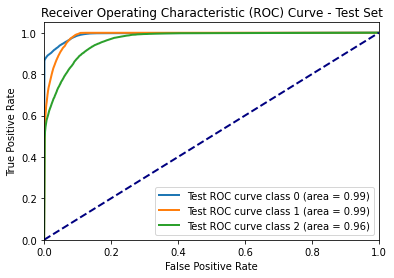

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_validation_bin = label_binarize(y_validation, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Initialize the decision tree classifier
model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Train the model
model.fit(X_train, y_train_bin)

# Predict on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train_bin, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Predict on the validation set
y_validation_pred = model.predict(X_validation)
validation_accuracy = accuracy_score(y_validation_bin, y_validation_pred)
print(f'Validation Accuracy: {validation_accuracy:.4f}')

# Predict on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test_bin, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate and display confusion matrix for training set
cm_train = confusion_matrix(y_train, np.argmax(y_train_pred, axis=1))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Confusion Matrix - Training Set')
plt.show()

# Generate and display confusion matrix for validation set
cm_validation = confusion_matrix(y_validation, np.argmax(y_validation_pred, axis=1))
disp_validation = ConfusionMatrixDisplay(confusion_matrix=cm_validation)
disp_validation.plot()
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Generate and display confusion matrix for test set
cm_test = confusion_matrix(y_test, np.argmax(y_test_pred, axis=1))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Confusion Matrix - Test Set')
plt.show()

# Calculate ROC curve and AUC for training set
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], model.predict_proba(X_train)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for training set
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Training ROC curve class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Set')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC curve and AUC for validation set
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_validation_bin[:, i], model.predict_proba(X_validation)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for validation set
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Validation ROC curve class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC curve and AUC for test set
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for test set
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Test ROC curve class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()


The following results that the model is a good fit.

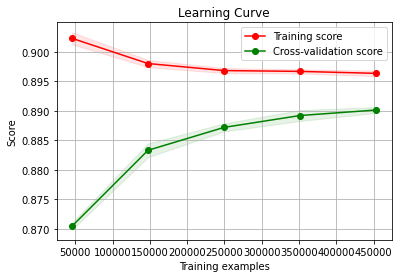

In [55]:
from sklearn.model_selection import train_test_split, learning_curve
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train_bin, cv=5)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

The training score starts around 0.88 and increases to nearly 0.98, while the validation score starts around 0.87 and increases to nearly 0.96. This indicates that the model is performing well on both the training and validation sets. This indicates that the model is a good fit although there is room for improvement due to the gap between the curves.